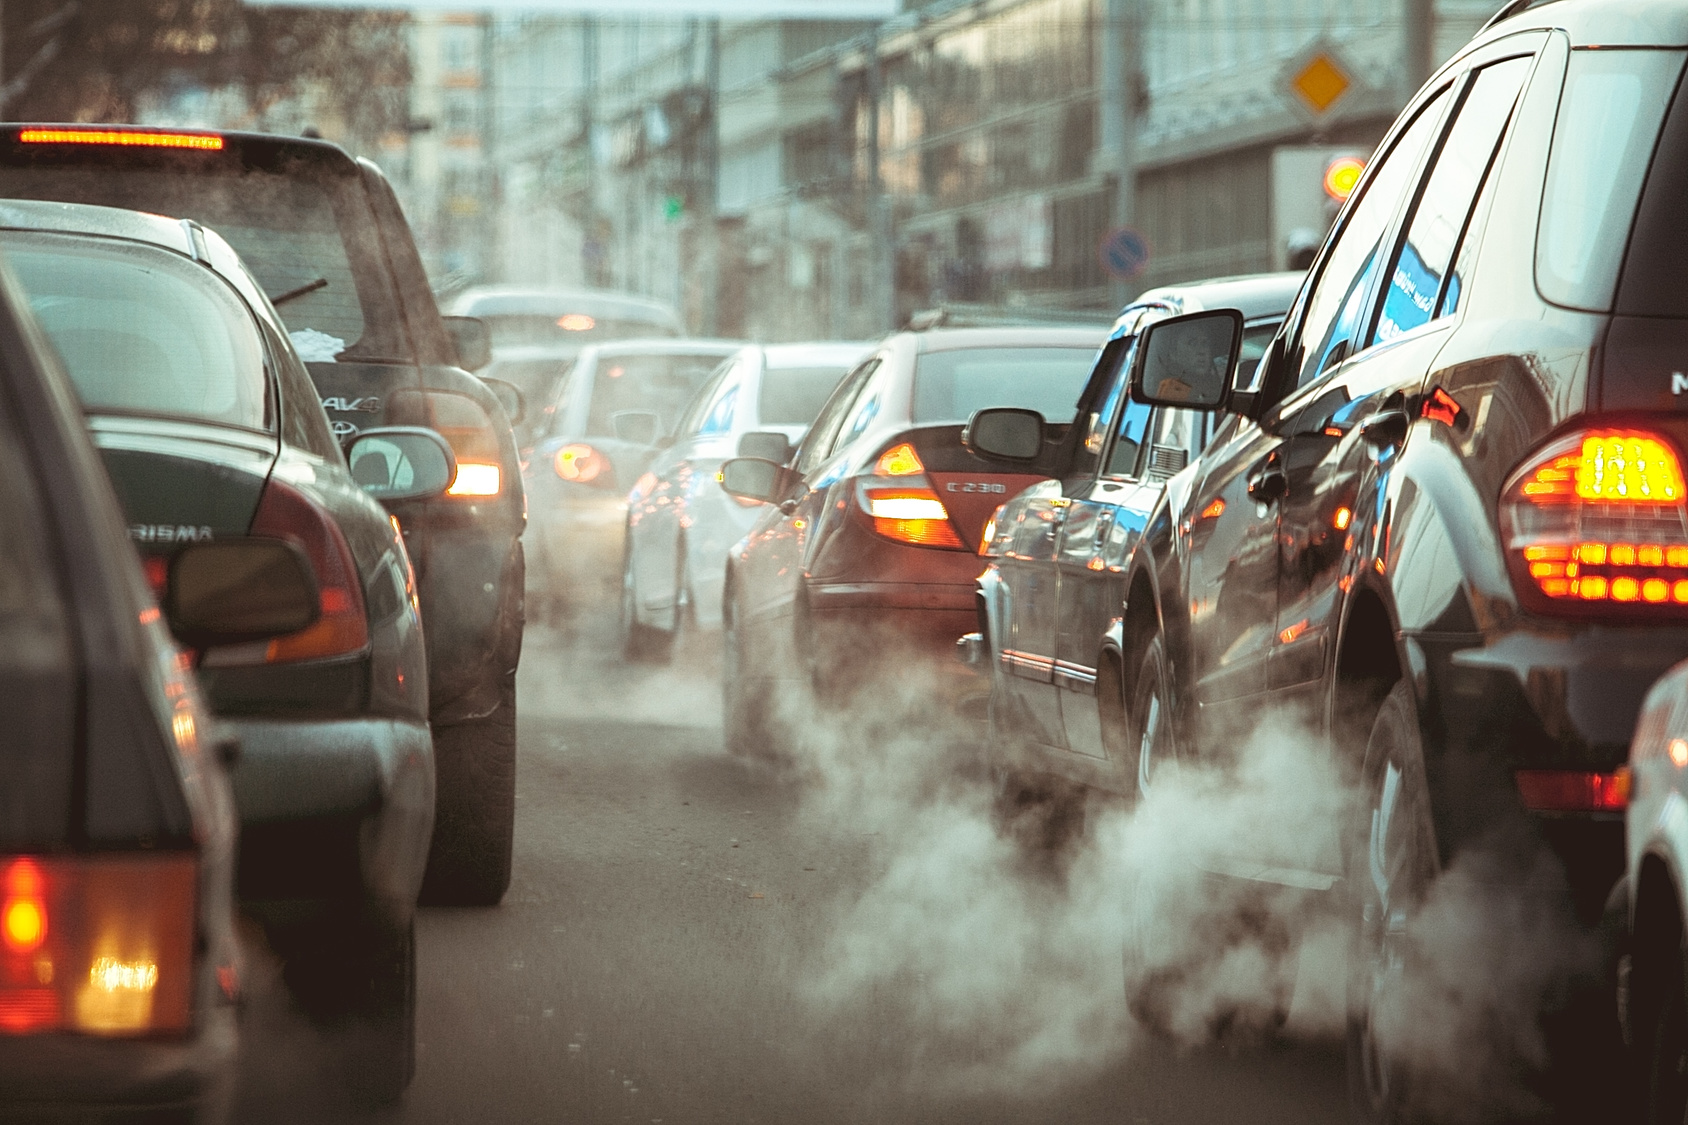

In [22]:
from IPython.display import display, Image
display(Image(filename="car.jpg"))

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.

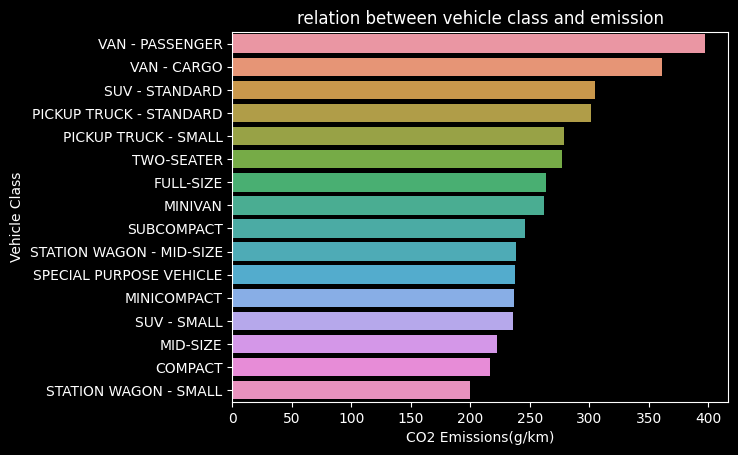

In [23]:
# importing and cleaning data

import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
db1=pd.read_csv("emission.csv")
# print(db.isnull().sum()/len(db))
db=db1.copy()
# print(db["Vehicle Class"].value_counts())
db4=((db[["Vehicle Class","CO2 Emissions(g/km)"]].groupby(["Vehicle Class"])).mean().reset_index()).sort_values(by="CO2 Emissions(g/km)",ascending=False)
sns.barplot(y="Vehicle Class", x="CO2 Emissions(g/km)", data=(db4))
plt.title("relation between vehicle class and emission")
plt.style.use("dark_background")
print(plt.style.available)
print(db1.head())

Text(0.5, 1.0, 'relation between fuel type and emission')

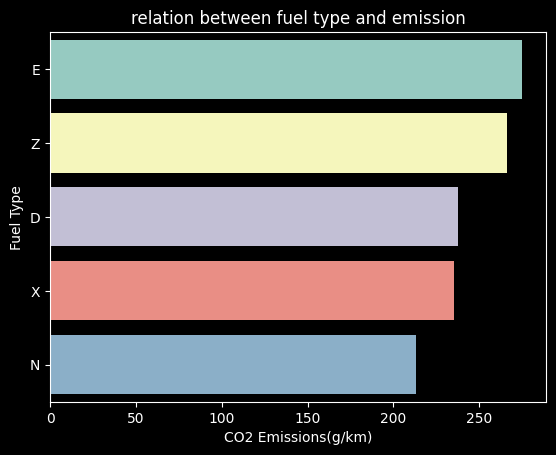

In [24]:
db5=((db[["Fuel Type","CO2 Emissions(g/km)"]].groupby(["Fuel Type"])).mean().reset_index()).sort_values(by="CO2 Emissions(g/km)",ascending=False)
sns.barplot(y="Fuel Type", x="CO2 Emissions(g/km)", data=db5)
plt.title("relation between fuel type and emission")

Text(0.5, 1.0, 'relation between number of miles per gallon and emission')

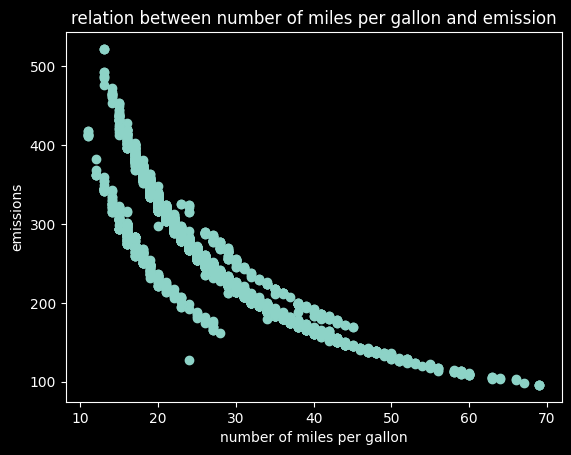

In [25]:
plt.scatter(db1["Fuel Consumption Comb (mpg)"],db1["CO2 Emissions(g/km)"])
plt.xlabel("number of miles per gallon")
plt.ylabel("emissions")
plt.title("relation between number of miles per gallon and emission")

  Transmission  CO2 Emissions(g/km)
0          A10           315.161290
4           A7           312.716981
2           A5           298.630952
1           A4           292.953846
5           A8           283.908163


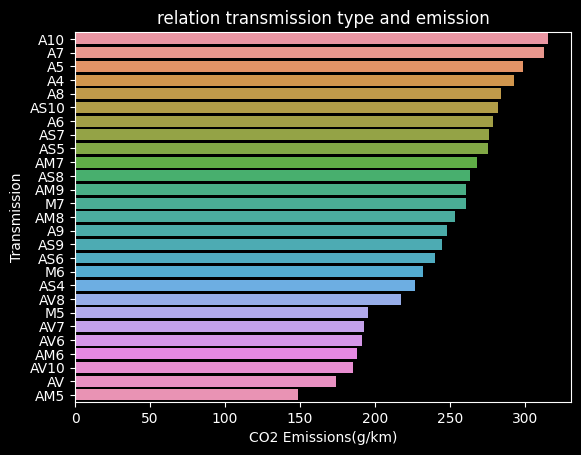

In [26]:
df=(db1[["Transmission","CO2 Emissions(g/km)"]].groupby("Transmission").mean()["CO2 Emissions(g/km)"].reset_index())
df=df.sort_values(by="CO2 Emissions(g/km)",ascending=False)
sns.barplot(y="Transmission", x="CO2 Emissions(g/km)", data=df)
plt.title("relation transmission type and emission")
print(df.head())

In [27]:
# Scaling data for machine learning

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
import numpy as np
from sklearn.cluster import KMeans
# print(db.hist(bins=20))
db=db.drop(columns=["Make","Model"]) # rimetterlo e toglierlo quando si runna
scalengin=RobustScaler()
db.columns=["class","enginesize","cyl","transmission","fuel","conscity","conshwy","consboth l/100km","consmpg","co2 g/km"]
db["enginesize"]=scalengin.fit_transform(db[["enginesize"]])
db["cyl"]=db1["Cylinders"]
scalerall=StandardScaler()
db[["conscity","conshwy","consboth l/100km"]]=scalerall.fit_transform(db[["conscity","conshwy","consboth l/100km"]])
scalercyl=StandardScaler()
db["cyl"]=scalercyl.fit_transform(db[["cyl"]])
scalerconsmpg=StandardScaler()
db["consmpg"]=scalerconsmpg.fit_transform(db[["consmpg"]])
scalertarget=StandardScaler()
db["co2 g/km"]=scalertarget.fit_transform(db[["co2 g/km"]])
# db=db.drop(columns=["consboth l/100km)"])
scalfuel=LabelEncoder()
scaltrasm=LabelEncoder()
scalfull=LabelEncoder()
db["class"]=scalfuel.fit_transform(db[["class"]])
db["transmission"]=scaltrasm.fit_transform(db[["transmission"]])
db["fuel"]=scalfull.fit_transform(db[["fuel"]])
# print(db["transmission"].value_counts())
db["class"] = db["class"].values.ravel()
db=db.astype(float)

# clus=3
# kmeans=KMeans(n_clusters=clus)
# kmeans.fit(db)
# labels=kmeans.labels_
# # db1["cluster"]=labels
# # print(labels)
# # print(db1.head(20))
# centroids=kmeans.cluster_centers_
# # print(centroids)



print(db.head())
# print(db.dtypes)
# print(db[["Cylinders"]].boxplot())

   class  enginesize       cyl  transmission  fuel  conscity   conshwy  \
0    0.0   -0.588235 -0.883408          14.0   4.0 -0.759002 -1.052781   
1    0.0   -0.352941 -0.883408          25.0   4.0 -0.387577 -0.603202   
2    0.0   -0.882353 -0.883408          22.0   4.0 -1.873275 -1.457401   
3   11.0    0.294118  0.210575          15.0   4.0  0.040990  0.026208   
4   11.0    0.294118  0.210575          15.0   4.0 -0.130437 -0.153624   

   consboth l/100km   consmpg  co2 g/km  
0         -0.855742  0.763110 -0.932933  
1         -0.475423  0.209966 -0.505646  
2         -1.754677  2.837400 -1.958421  
3          0.043193 -0.343178  0.075464  
4         -0.129679 -0.066606 -0.112542  


c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
db5=db1.copy()
# db5=db5.drop(columns=["Make","Model"])

clus=3
kmeans=KMeans(n_clusters=clus)
kmeans.fit(db)
labels=kmeans.labels_
db5["cluster"]=labels
db5=db5.sort_values(by="cluster")
# print(labels)
print(db5.head(20))
# centroids=kmeans.cluster_centers_
# print(centroids)
# print(db5.head())

             Make                           Model             Vehicle Class  \
7384        VOLVO                     XC90 T6 AWD            SUV - STANDARD   
2868          KIA                        SPORTAGE               SUV - SMALL   
2869          KIA                        SPORTAGE               SUV - SMALL   
2870          KIA                    SPORTAGE AWD               SUV - SMALL   
2871          KIA                    SPORTAGE AWD               SUV - SMALL   
2876   LAND ROVER                 DISCOVERY SPORT               SUV - SMALL   
2877   LAND ROVER                             LR4            SUV - STANDARD   
2878   LAND ROVER                     RANGE ROVER            SUV - STANDARD   
2879   LAND ROVER          RANGE ROVER TD6 DIESEL            SUV - STANDARD   
2880   LAND ROVER        RANGE ROVER SUPERCHARGED            SUV - STANDARD   
2881   LAND ROVER    RANGE ROVER SUPERCHARGED LWB            SUV - STANDARD   
2867          KIA               SOUL ECO DYNAMICS   

c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


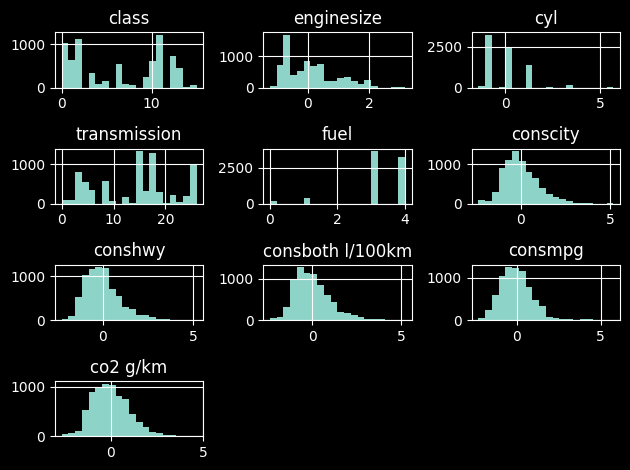

In [29]:
#Studying distribuition of data

distribuition=db.hist(bins=20)
plt.tight_layout()


          variables          VIF
7  consboth l/100km  4635.055014
5          conscity  2060.980062
6           conshwy   568.395660
1        enginesize     8.590191
2               cyl     7.544711
8           consmpg     7.489374
4              fuel     7.097255
3      transmission     5.276341
0             class     3.060704


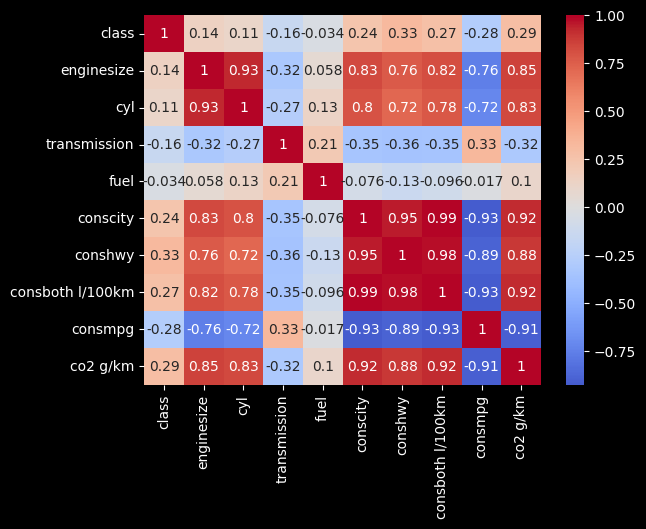

In [30]:
# Calculating correlations and vif

cor=db.corr().stack().reset_index()
cor.columns=["var1","var2","cor"]
cor=cor[cor["var1"]!=cor["var2"]]
sns.heatmap(db.corr(),annot=True,cmap="coolwarm",center=0)
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif=vif.sort_values(by=["VIF"],ascending=False)
    return vif
print(cal_vif(db.drop(columns="co2 g/km")))
# print(cor)

In [31]:
#Creating the model

db2=db.copy()
db2=db2.drop(columns=["consboth l/100km","conscity","conshwy"])
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,mean_squared_error
x=db2.drop(columns="co2 g/km")
y=db2["co2 g/km"]
model=LinearRegression()
model2=SVR(kernel="linear")
model3=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
grid={"n_estimators": [10, 100, 150],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 4, 5]}
result=cross_validate(model3,x,y,cv=10)#r2 di 0.99
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=0)
search=GridSearchCV(estimator=model3, param_grid=grid, cv=5)
search.fit(xtrain,ytrain)
bestmodel=search.best_estimator_

# model3.fit(xtrain,ytrain)
# pred=model3.predict(xtest)
pred2=bestmodel.predict(xtest)
# print(r2_score(ytest,pred))
print(r2_score(ytest,pred2))
print(mean_squared_error(ytest,pred2))
print(mean_absolute_error(ytest,pred2))
print(xtest)

# print(result["test_score"].mean())
# print(db2.head())

0.99444990636103
0.005505243063102721
0.05379932416787125
      class  enginesize       cyl  transmission  fuel   consmpg
6307    3.0    0.000000  0.210575          26.0   4.0 -0.066606
5036   11.0   -0.588235 -0.883408          17.0   0.0  0.763110
1995    3.0    0.470588  0.210575           9.0   4.0 -0.204892
4156    2.0   -0.294118 -0.883408          22.0   3.0  1.177968
6328    3.0    0.000000  0.210575           9.0   4.0  0.209966
...     ...         ...       ...           ...   ...       ...
7032   11.0    0.000000  0.210575           5.0   0.0  0.348252
3239    4.0    0.294118  0.210575          15.0   3.0 -0.619750
6991   13.0    0.000000  0.210575          17.0   4.0 -0.066606
3319    2.0    0.294118  0.210575           9.0   4.0  1.039682
6247    2.0   -0.588235 -0.883408          17.0   4.0  0.486538

[2216 rows x 6 columns]


In [32]:
#Creating an automatized model

# print(db1.head())
newclass=input("class ").upper()
newenginesize=float(input("engine size "))
newcyl=float(input("cylindres "))
newtrasm=input("transimssion ").upper()
newfuel=input("fuel type ").upper()
newconsmpg=float(input("num of miles per gallon "))
# scalercyl=StandardScaler()
# db["cyl"]=scalercyl.fit_transform(db[["cyl"]])
# scalerconsmpg=StandardScaler()
# db["consmpg"]=scalerconsmpg.fit_transform(db[["consmpg"]])

dfnuovo=pd.DataFrame({
    "class":newclass,
    "enginesize":newenginesize,
    "cyl":newcyl,
    "transmission":newtrasm,
    "fuel":newfuel,
    "consmpg":newconsmpg
}, index=[0])
dfnuovo["class"]=scalfuel.transform(dfnuovo[["class"]])
dfnuovo["enginesize"]=scalengin.transform(dfnuovo[["enginesize"]])
dfnuovo["cyl"]=scalercyl.transform(dfnuovo[["cyl"]])
dfnuovo["consmpg"]=scalerconsmpg.transform(dfnuovo[["consmpg"]])
dfnuovo["transmission"]=scaltrasm.transform(dfnuovo[["transmission"]])
dfnuovo["fuel"]=scalfull.transform(dfnuovo[["fuel"]])
dfnuovo=dfnuovo.astype(float)
prednuovo=bestmodel.predict(dfnuovo)
prednuovo=pd.DataFrame({"emission":prednuovo})
prednuovo["emission"]=scalertarget.inverse_transform(prednuovo[["emission"]])


print(prednuovo)

ValueError: could not convert string to float: ''